<h1><center>Programming Exercise 2:<br>Logistic Regression</center></h1>

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import minimize, fmin

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Logistic Regression
- Assignment: As the administrator of a university department determine each applicant's chance of admission based on the results of two exams

## 1.1 Visualizing the Data

In [2]:
scores1,scores2,class_label = np.loadtxt('ex2data1.txt',delimiter=',',unpack=True)

# Let's build the design matrix
design = np.c_[np.ones_like(scores1),scores1,scores2]
# and theta initialized to zero's right away
theta = np.zeros(np.shape(design)[1])

admit_cut = (class_label==1) # admitted students cut
reject_cut = (class_label==0) # rejected students cut 

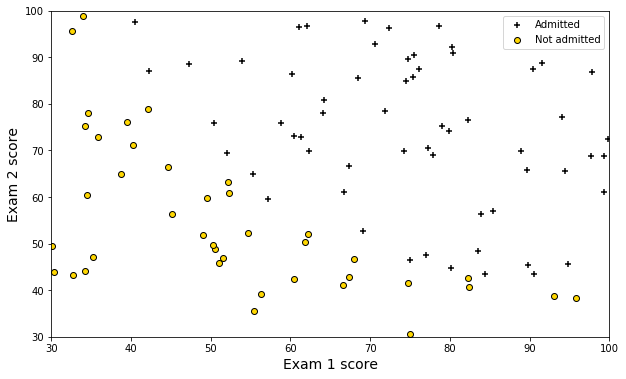

In [3]:
# Plot
plt.figure()
plt.scatter(design[:,1][admit_cut],design[:,2][admit_cut],c='k',marker='+',label='Admitted')
plt.scatter(design[:,1][reject_cut],design[:,2][reject_cut],marker='o',edgecolor='k',facecolor='gold',label='Not admitted')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel('Exam 1 score',fontsize=14)
plt.ylabel('Exam 2 score', fontsize=14)
plt.legend(loc='upper right',fontsize='medium')
plt.show()

## 1.2 Implementation

In [4]:
def sigmoid(z):
    '''
    Computes the sigmoid function - the hypothesis for Logistic Regression - given input z
    In the case of Logistic Regression z = X*Theta (which is an m by 1 vector)
    so that H = 1/(1+exp(-X*Theta))
    
    Parameters
    ----------
    z: array
    
    Returns
    -------
    value of sigmoid at the given vector z
    '''
    return 1/(1+np.exp(-z))

In [5]:
sigmoid(0) # != 1/2

0.5

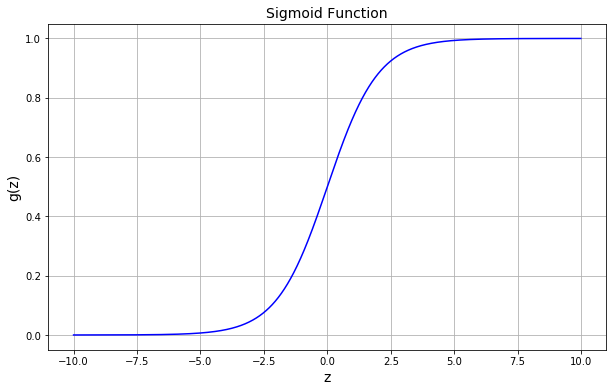

In [6]:
# Let's plot the sigmoid and confirm its shape
plt.figure()
plt.grid(True)
zz = np.arange(-10,10,0.01)
plt.plot(zz,sigmoid(zz),'-b')
plt.xlabel('z',fontsize=14)
plt.ylabel('g(z)',fontsize=14)
plt.title('Sigmoid Function',fontsize=14)
plt.show()

- Note that the `@` operator is used for matrix multiplication, a feature introduced in Python 3.5 and the `*` operator is used for element-wise multiplication; see https://stackoverflow.com/questions/27385633/what-is-the-symbol-for-in-python

In [7]:
# Let's define the cost function for Logistic Regression
# I will add the regularization bit now and make it an optional parameter of the function
def costFunction(theta,design,output,reg_param=0):
    '''
    Computes the cost function J = -1/m{Y^T*Log(g(X*Theta))+(1-Y)^T*Log(1-g(X*Theta))}+lambda/2m{Theta^T*Theta}
    which is a function of Theta for a given sample set; the regularization term is included only if a regularization parameter is passed in 
    X is the design matrix of shape m by (n+1), Theta is the fit (n+1) parameter vector, Y is the m output vector of class labels
    and lambda is the regulatization parameter
    Returns the scalar J
    
    Parameters
    ----------
    theta: (n+1) fit parameter vector
    design: m by (n+1) design matrix
    output: m-dimensional output vector
    reg_flag (optional): scalar, regularization parameter; default is 0
    
    Returns
    -------
    costJ: scalar, value of the cost function
    '''
    
    m = np.shape(design)[0] # sample size
    hypothesis = sigmoid(design @ theta)
    costJ = -1/m*(output.T @ np.log(hypothesis)+((1-output).T @ np.log(1-hypothesis))+reg_param/(2*m)*(theta.T @ theta))
                  
    return costJ

In [8]:
# Test with initial theta of zeros
costFunction(theta,design,class_label)

0.69314718055994518

In [9]:
# Let's define gradient descent for Logistic Regression
def gradientDescent(theta,design,output,history_j=None,alpha=0.1,iterations=0,reg_param=0):
    '''
    Performs update of (n+1) fit parameters with batch gradient descent method, i.e
        Theta_J := Theta_j - alpha*dJ/dTheta_j for j=0,2,..,n
                 = {1-alpha*lambda/m}Theta-alpha/m{X^T*{g(X*Theta)-Y}}
    The regularization factor will only be added if a regularization parameter is passed in
    
    Parameters
    ----------
    theta: (n+1) fit parameter vector
    design: m by (n+1) design matrix
    output: m-dimensional output vector
    history_j (optional): dictionary with key "theta_history" where we keep all values of theta vector as we iterate
    alpha: scalar learning rate
    iterations: number of iterations
    reg_param: scalar, regularization parameter; default is 0
    '''
    print('Initial values:')
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
    print('\tCost Function J: {}'.format(costFunction(theta,design,output)))
    m = np.shape(design)[0] # sample size
    hypothesis = sigmoid(design @ theta)

    if True:
        # Step through parameter space
        for ii_iter in range(iterations):
            theta[:] = (1-alpha*reg_param/m)*theta - alpha/m*(design.T @ (hypothesis-output)) # [:] will assign values to the elements of the theta array and thus will change the original array
                                                                                              # if we do theta = tem_theta instead, the value it pointed to before the assignment in this function will remain unchanged        
            if history_j is not None: # if we've provided a dictionary, save the respective value
                history_j["theta_history"][ii_iter] = theta
                history_j["J_history"][ii_iter] = costFunction(theta,design,output)

        print('\nAfter {} iterations, final values:'.format(iterations))
        for idx_theta,ii_theta in enumerate(theta):
            print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))

        print('\tCost Function J: {}'.format(costFunction(theta,design,output)))

In [10]:
# The assigment asks to use a minimization function but first let's try out doing GD with our function

# As we iterate through different values of theta we want to keep a record of J
history_j = dict.fromkeys(['theta_history','J_history'])

# How many iterations of GD? Learning rate?
iterations = 100
alpha = 0.01

# Allocate space
history_j['J_history'] = np.empty(iterations)
history_j['theta_history'] = np.empty((iterations,np.shape(theta)[0]))

In [11]:
# Apply our GD
gradientDescent(theta,design,class_label,history_j,alpha,iterations)

Initial values:
	Theta_0: 0.0
	Theta_1: 0.0
	Theta_2: 0.0
	Cost Function J: 0.6931471805599452

After 100 iterations, final values:
	Theta_0: 0.10000000000000007
	Theta_1: 12.009216589291151
	Theta_2: 11.262842205513605
	Cost Function J: nan


/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


- The issue comes from the computing the cost function with the optimized parameters for theta
- This is because `z = X*`$\theta$ gives large numbers which when computing `np.exp(-X*`$\theta$) is subject to very large numbers and throws out the error:
    - `/home/les67/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':`
    - We are overriding the register
- There are a few workarounds for this. See discussions here: https://stackoverflow.com/questions/9559346/deal-with-overflow-in-exp-using-numpy, https://stackoverflow.com/questions/9478663/logit-and-inverse-logit-functions-for-extreme-values/9478781#9478781
- However since the homework asks us to use a minimizing function to find $\theta$ we will leave this alone in the interest of time

### Notes on minimizing in Python:
- There are two minimization functions we can use from the scipy.optmize library:
    1. `minimize` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize): minimizes a scalar function of one or more variables. Can take derivative functions gradient and/or hessian, constraints, bounds, tolerance, choose from a number of solver algorithms like Newton-CG, BFGS, L-BFGS-B, Nelder-Mead, etc
    2. `fmin` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html): minimizes a function using a Nelder-Mead simplex downhill algorithm but only uses function values, not derivatives or second derivatives. From the notes in the man page we see that "it will usually be slower than an algorithm that uses first or second derivative information"

In [16]:
# Let's try minimize()
# The solver Nelder-Mead works and it's very fast

theta = np.zeros(np.shape(design)[1]) # re-initialize theta
optimized_theta = minimize(costFunction,theta,args=(design,class_label),method='Nelder-Mead',options={'disp':True,'maxiter': 400})
                            # args=() are the rest of the arguments that the function of interest takes
                            # returns an OptimizeResult object that includes the solution array among other information

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [24]:
# Let's see with fmin()
# Should be very similar in performance since the same solver is being used

theta = np.zeros(np.shape(design)[1]) # re-initialize theta
optimized_theta = fmin(costFunction,theta,args=(design,class_label),maxiter=400,disp=True) # returns the solution array

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [25]:
# Now let's confirm the value of the cost function at this optimized theta
costFunction(optimized_theta,design,class_label)

0.2034977015902151

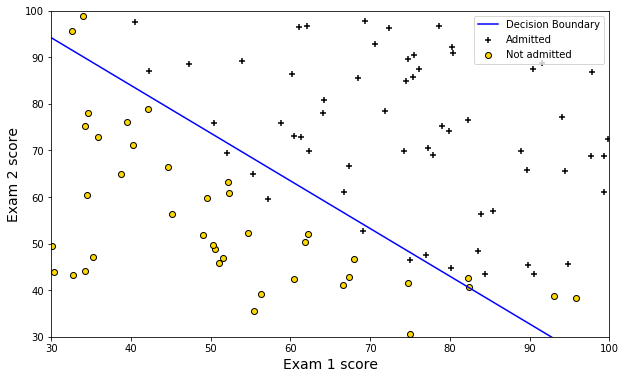

In [23]:
# Let's plot the decision boundary against the 2D feature space
# Recall that the decision boundary is defined by hypothesis(x|theta)==0 which is our 50% probability
# Since for this problem we have hypothesis(x|theta)=theta0+theta1*x1+theta2*x2=0
# we can solve for x2 as a function of x1 and the theta's: x2 = -(theta1/theta2)*x1-(theta0/theta2)

# Plot
plt.figure()
plt.scatter(design[:,1][admit_cut],design[:,2][admit_cut],c='k',marker='+',label='Admitted')
plt.scatter(design[:,1][reject_cut],design[:,2][reject_cut],marker='o',edgecolor='k',facecolor='gold',label='Not admitted')
x1 = np.arange(30,100,1)
plt.plot(x1,-(optimized_theta[1]/optimized_theta[2])*x1-(optimized_theta[0]/optimized_theta[2]),c='b',label='Decision Boundary')
plt.xlim(30,100)
plt.ylim(30,100)
plt.xlabel('Exam 1 score',fontsize=14)
plt.ylabel('Exam 2 score', fontsize=14)
plt.legend(loc='upper right',fontsize='medium')
plt.show()

In [27]:
# Predictions for a student with exam 1 score 45 and exam 2 score 85
sigmoid(np.array([1,45,85]) @ optimized_theta)

0.77629159041124107

In [41]:
def prediction(theta,design):
    '''
    Makes prediction of class label in a binary problem given an optimized parameter vector theta
    and a dataset (in the format of the design matrix). The prediction is: If hypothesis(x|theta)>=0.5 label 1
    else label 0
    
    Parameters
    ----------
    theta: (n+1) fit parameter vector
    design: m by (n+1) design matrix
    
    Returns
    -------
    label: m-dimensional vector, either 0 or 1 for class label prediction
    '''    
    probability = sigmoid(design @ theta)
    label = (probability>=0.5).astype(int) # converts boolean true to 1 and false to 0
    
    return label

In [44]:
# Prediction of our hypothesis (w/ optimized theta of course) on our training set
prediction_label = prediction(optimized_theta,design)

In [1]:
def accuracy(prediction,og_label):
    '''
    Computes percentage accuracy of prediction of class labels by direct comparison to given (original) labels
    in training data set
    
    Parameters
    ----------
    predictions: m-dimensional vector of prediction labels
    og_label: m-dimensional vector of original training labels
    
    Returns
    -------
    acc: scalar, percentage accuracy 
    '''
    m = np.size(og_label)
    acc = sum(prediction==og_label)/m # summing True booleans
    return acc 

In [60]:
print('Training accuracy: {:0.1f} %'.format(accuracy(prediction_label,class_label)*100))

Training accuracy: 89.0 %


# 2. Regularized Logistic Regression